# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# Data Normalization

In [2]:
df = pd.read_csv('music_data.csv')
print(df.shape)
df.head()

(169909, 19)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
cols = ['artist','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
non_categorical = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
categorical = ['artist','key','mode']

# %ms = MinMaxScaler()
df[non_categorical] = df[non_categorical].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# df[non_categorical] = mms.fit_transform(df[non_categorical])
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.998996,['Carl Woitschach'],0.716599,0.028442,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,0.745000,1,Singende Bataillone 1. Teil,0,1928,0.052219,0.485348,0.7790,1928
1,0.997992,"['Robert Schumann', 'Vladimir Horowitz']",0.383603,0.051316,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,0.494026,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.047678,0.344019,0.0767,1928
2,0.606426,['Seweryn Goszczyński'],0.758097,0.018374,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,0.627609,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.958720,0.439086,0.8800,1928
3,0.998996,['Francisco Canaro'],0.790486,0.032538,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,0.708887,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.095562,0.442470,0.7200,1928
4,0.993976,"['Frédéric Chopin', 'Vladimir Horowitz']",0.212551,0.126450,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,0.676079,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.043756,0.254614,0.0693,1928


# Data Visualization

In [4]:
corr = df[non_categorical].corr()
corr.style.background_gradient(cmap='coolwarm')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.220569,0.294170,0.225305,-0.265950,-0.281429,-0.105532,0.560242,-0.004872,-0.134500
energy,0.220569,1.000000,0.782982,-0.045226,-0.750283,-0.287692,0.126293,0.350086,0.249936,0.036396
loudness,0.294170,0.782982,1.000000,-0.105796,-0.567072,-0.417033,0.052985,0.308418,0.211114,-0.014687
speechiness,0.225305,-0.045226,-0.105796,1.000000,-0.056077,-0.115735,0.147667,0.056383,-0.010070,-0.058449
acousticness,-0.265950,-0.750283,-0.567072,-0.056077,1.000000,0.335821,-0.023871,-0.185540,-0.204982,-0.079311
instrumentalness,-0.281429,-0.287692,-0.417033,-0.115735,0.335821,1.000000,-0.047397,-0.193929,-0.107570,0.084814
liveness,-0.105532,0.126293,0.052985,0.147667,-0.023871,-0.047397,1.000000,-0.000426,0.008124,0.034270
valence,0.560242,0.350086,0.308418,0.056383,-0.185540,-0.193929,-0.000426,1.000000,0.171182,-0.198760
tempo,-0.004872,0.249936,0.211114,-0.010070,-0.204982,-0.107570,0.008124,0.171182,1.000000,-0.028816
duration_ms,-0.134500,0.036396,-0.014687,-0.058449,-0.079311,0.084814,0.034270,-0.198760,-0.028816,1.000000


In [5]:
def cluster_plot(new_data):    
    kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(new_data)
    t = [30,40,50,60,70,80,90]
    label_color = [t[i] for i in pred_y]
    plt.figure(figsize = (7,7))
    plt.scatter(new_data.iloc[:,0],new_data.iloc[:,1], c=label_color, alpha=0.5,cmap='viridis') 
    plt.show()

def silhouette(new_data):
    kmeans = KMeans(random_state=0)
    visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='silhouette', timings=False)
    visualizer.fit(new_data)    
    visualizer.poof()

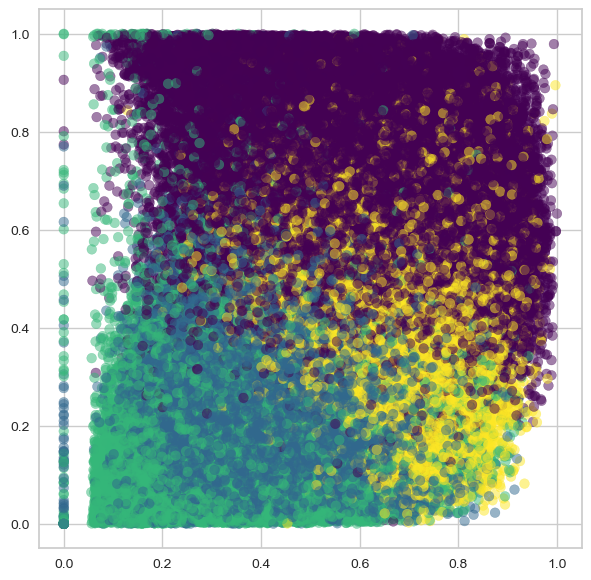

In [6]:
cluster_plot(df[non_categorical])

# PCA (Principal Component Analysis)

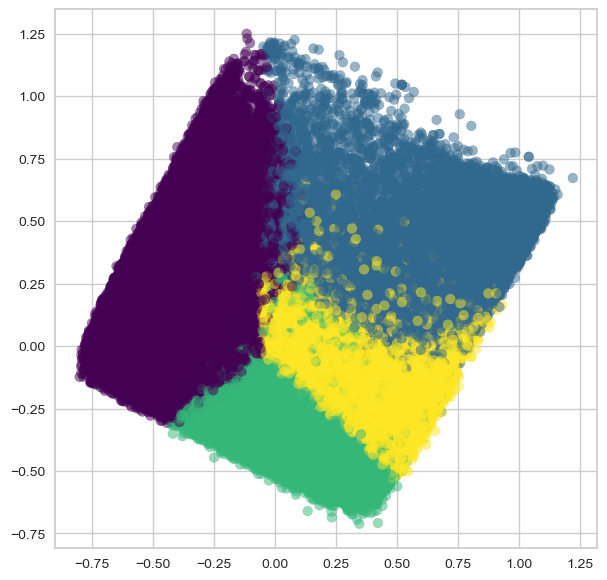

,0,1,2,3,4,5,6
0,0.576489,-0.138849,0.474513,-0.069667,0.019935,-0.047704,-0.007191
1,1.046452,0.464292,0.025553,-0.183309,0.087433,-0.053232,-0.032483
2,0.039141,-0.508134,0.181155,-0.168655,0.705307,0.412507,0.048128
3,0.736481,0.080262,0.628113,-0.164995,0.140678,-0.063648,-0.058877
4,0.964053,0.557558,0.003448,-0.041694,-0.045182,0.012866,-0.139625


In [7]:
pca = PCA(0.95)
data = df.drop_duplicates()
data = pca.fit_transform(data[non_categorical])
cluster_plot(pd.DataFrame(data))
pd.DataFrame(data).head()

In [8]:
data = pd.DataFrame(data)

# Model Training

In [9]:
def train(df_train):
    n = 1
    for _ in range(n):
        # train_df, test_df = train_test_split(df_train)
        km = KMeans(
            n_clusters=4, init='random',
            n_init=10, max_iter=1000, 
            tol=1e-04, random_state=0
        )
        y_km = km.fit(df_train)
        # km.labels_
        # km.predict(test_df)
    return km

def k_mean_distance(center_coordinates, data_coordiantes):
    summ=0
    mag=0
    for i in range(len(center_coordinates)):
        summ+=(center_coordinates[i]-data_coordiantes[i])**2
        mag+=(data_coordiantes[i])**2
    return (summ)*0.5

In [10]:
km = train(data)
data = pd.DataFrame(data)
# pickle.dump(km, open('KMeans_Clustering', 'wb'))
data['label'] = km.labels_
data['artists'] = df.artists
data['name'] = df.name
data['popularity'] = df.popularity
data['explicit'] = df.explicit
data.head()

,0,1,2,3,4,5,6,label,artists,name,popularity,explicit
0,0.576489,-0.138849,0.474513,-0.069667,0.019935,-0.047704,-0.007191,1,['Carl Woitschach'],Singende Bataillone 1. Teil,0,0
1,1.046452,0.464292,0.025553,-0.183309,0.087433,-0.053232,-0.032483,1,"['Robert Schumann', 'Vladimir Horowitz']","Fantasiestücke, Op. 111: Più tosto lento",0,0
2,0.039141,-0.508134,0.181155,-0.168655,0.705307,0.412507,0.048128,0,['Seweryn Goszczyński'],Chapter 1.18 - Zamek kaniowski,0,0
3,0.736481,0.080262,0.628113,-0.164995,0.140678,-0.063648,-0.058877,1,['Francisco Canaro'],Bebamos Juntos - Instrumental (Remasterizado),0,0
4,0.964053,0.557558,0.003448,-0.041694,-0.045182,0.012866,-0.139625,1,"['Frédéric Chopin', 'Vladimir Horowitz']","Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0


# Generating Outcome

In [11]:
def song_recommendation(song,data):
    arr = []
    dummy_df = data.loc[data['label']==song.label.values[0]]
    print(len(dummy_df.values))
    for i in range(len(dummy_df.values)):
        if(i>51): break
        dist = k_mean_distance(dummy_df.values[i][0:7],song.values[0][0:7])
        arr.append((
            dummy_df.values[i][11]/(dist+0.00000001)**2,
            dist,
            dummy_df.values[i][11],
            dummy_df.values[i][8],
            dummy_df.values[i][9],
            dummy_df.values[i][10],
        ))
    arr.sort()
    return arr

def song_print(song):
    print('='*200)
    print('Artist:  ', song.artists.values[0])
    print('Song Name:   ', song.name.values[0])
    print('Type:   ', song['explicit'].values[0])
    print('='*200)

In [14]:
song = data.loc[[12980]]
ans = song_recommendation(song,data)
song_print(song)
j=1
for i in ans[::-1]:
    print('Number:  ', j)
    print('Popularity/distance:  ',i[0])
    print('Artist:  ', i[3])
    print('Song Name:   ', i[4])
    print('Type:   ', i[5])
    print('-'*100)
    j+=1

74688
Artist:   ['Camouflage']
Song Name:    The Great Commandment
Type:    0
Number:   1
Popularity/distance:   8.914802220093199
Artist:   ['Shorty Bralik', 'ParkPlace Swagg']
Song Name:    No Lack'n
Type:    0
----------------------------------------------------------------------------------------------------
Number:   2
Popularity/distance:   3.6213644802090337
Artist:   ['Эрих Мария Ремарк']
Song Name:    Часть 220.3 - Триумфальная арка
Type:    0
----------------------------------------------------------------------------------------------------
Number:   3
Popularity/distance:   2.8401364537129647
Artist:   ['Эрих Мария Ремарк']
Song Name:    Часть 174.2 - Триумфальная арка
Type:    0
----------------------------------------------------------------------------------------------------
Number:   4
Popularity/distance:   2.783977510773572
Artist:   ['Эрнест Хемингуэй']
Song Name:    Часть 8.5 & Часть 9.1 - Старик и море
Type:    0
---------------------------------------------------